<a href="https://colab.research.google.com/github/marcheliaz133/Titanic-EDA/blob/main/Titanic_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

In this notebook, we will perform Exploratory Data Analysis (EDA) on Titanic Dataset. Steps:
1. Preliminary
2. Data cleaning
3. Explore the insights by visualizing the data

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Data

In [ ]:
# adjust the path accordingly
df = pd.read_excel('titanic.xlsx')
data = df.copy()

#  Preliminary

In [ ]:
# Showing top 5 rows of the data
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,survived,name,sex,age
255,1,"Sagesser, Mlle. Emma",female,24.0
463,0,"Jefferys, Mr. Clifford Thomas",male,24.0
213,1,"Newell, Miss. Madeleine",female,31.0
69,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN
307,0,"White, Mr. Richard Frasar",male,21.0


Observations:
1. Column `age` is numeric
2. `name` and `sex` are categoric, `sex` contain two distinct values (male or female)
3. `survived` is apparently binary (0,1)
4. No obvious defect on the data (column name vs its entries), all looks good

In [ ]:
data['age'] = data['age'].round().astype('Int64')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  500 non-null    int64 
 1   name      500 non-null    object
 2   sex       500 non-null    object
 3   age       451 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 16.2+ KB


,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29
1,1,"Allison, Master. Hudson Trevor",male,1
2,0,"Allison, Miss. Helen Loraine",female,2
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25


All dtypes seem OK (appropriate), given the corresponding column name

# Statistical Summary

In [ ]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name','sex']

numericals = ['survived','age']

In [ ]:
# Syntax numerical statistical summary
data[numericals].describe()

,survived,age
count,500.000000,451.0
mean,0.540000,35.91796
std,0.498897,14.764971
min,0.000000,1.0
25%,0.000000,24.0
50%,1.000000,35.0
75%,1.000000,47.0
max,1.000000,80.0


Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean ~ 50% (Median) in `age` column, indicating somewhat a symmetrical distribution
* `survived` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. Only need to check balance level


In [ ]:
# Syntax describe method on categorical data
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observations:
* `sex` have 2 unique value, 'male' and 'female', most of the passengers are male
* Seems there is duplicate value in `name` column, will be checked later

In [ ]:
categoricals

['name', 'sex']

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [ ]:
for col in numericals:
  print(f"==== {col} ====")
  print(data[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24    23
30    20
36    19
35    14
45    14
42    14
18    14
28    13
22    12
25    11
48    11
31    11
21    11
23    11
29    10
54    10
34    10
47    10
50    10
27     9
39     9
49     8
38     8
40     8
33     8
19     8
55     8
32     8
60     7
26     7
17     7
44     6
1      6
58     6
37     6
52     6
46     6
64     5
51     5
57     5
62     4
16     4
53     4
61     4
56     4
43     4
41     3
8      3
63     3
20     2
71     2
15     2
6      2
4      2
65     2
2      1
11     1
59     1
80     1
14     1
70     1
76     1
13     1
12     1
67     1
7      1
3      1
Name: count, dtype: Int64 



# Pembersihan Data

## 1. Duplicate Handling

In [ ]:
len(data)

500

In [ ]:
len(data.drop_duplicates())

499

In [ ]:
len(data.drop_duplicates()) / len(data)
# Ensure the output of this cell is 1. If it’s not, duplicate records exist in the dataset

0.998

In [ ]:
list(data.columns)

['survived', 'name', 'sex', 'age']

In [ ]:
# Step 1: Extract all duplicate rows, including the original entries
duplicates = data[data.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54
349,1,"Eustis, Miss. Elizabeth Mussey",female,54


In [ ]:
duplicates.groupby(list(data.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54,2


In [ ]:
duplicates.groupby(list(data.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54,2


In [ ]:
# Step 2: Count the frequency of each duplicate row
duplicate_counts = duplicates.groupby(list(data.columns)).size().reset_index(name='number of duplicates')

# Step 3: Sort by the number of duplicates
sorted_duplicates = duplicate_counts.sort_values(by='number of duplicates', ascending=False)

# Call the result
print("Duplicate entries ordered by their occurrence count:")
sorted_duplicates

Duplicate entries ordered by their occurrence count:


,survived,name,sex,age,number of duplicates
0,1,"Eustis, Miss. Elizabeth Mussey",female,54,2


In the code (df[df.duplicated(keep=False)]), you are directly printing the rows that have duplicates by using the duplicated method with the parameter keep=False. This prints all rows that have duplicates, without removing anything from the DataFrame.

In [ ]:
#Remove duplicate entries and verify that no duplicates remain
data = data.drop_duplicates()
len(data.drop_duplicates()) / len(data)

1.0

#### Duplicate Entries Handled

# 2. Missing value handling
### Identifying Missing value

In [ ]:
#Count the number of missing values in each column
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
#Count the number of missing values in each column
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24,23
30,20
36,19
35,14
45,14
42,14
18,14
28,13
22,12


In [ ]:
total_rows = len(data)
total_rows

499

In [ ]:
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
# percentage version
total_rows = len(data)

# Count percentage of missing values in each column
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


The percentage of missing values below 20% so we handle numerically with median, categorical with mode. But the categorical data type does not have missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  499 non-null    int64 
 1   name      499 non-null    object
 2   sex       499 non-null    object
 3   age       450 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 20.0+ KB


In [ ]:
data['age'].median()
data['age'].fillna(data['age'].median())

,age
0,29
1,1
2,2
3,30
4,25
5,48
6,63
7,39
8,53
9,71


In [ ]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
      # If the column type is object , fill missing values with the mode
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
    # Since the data types are only object and numeric, we use else for numeric types
    # If the column is numeric, fill missing values with the median
       data[column] = data[column].fillna(data[column].median())

In [ ]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Success removing NULL values!

In [ ]:
def preprocess_data(data2):
    # Extract titles from the 'name' column
    data2['title'] = data['name'].str.extract(r',\s*([^\.]*)\s*\.')

    # Creating Binary Columns for Each Title
    titles = data2['title'].unique()
    for title in titles:
        data2[f'title_{title}'] = (data2['title'] == title).astype(int)

    # Convert 'sex' to binary (1 for male, 0 for female)
    data2['sex_binary'] = (data2['sex'] == 'male').astype(int)

    # Categorize age into bins
    bins = [0, 4, 9, 18, 59, 100]
    labels = ['Toddler', 'Child', 'Teenager', 'Adult', 'Senior']
    data2['age_category'] = pd.cut(data2['age'], bins=bins, labels=labels)

    return data2

# Run preprocessing
data2 = preprocess_data(data)

# Check the result
data2.info()
data2.sample(5)


<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   survived            499 non-null    int64   
 1   name                499 non-null    object  
 2   sex                 499 non-null    object  
 3   age                 499 non-null    Int64   
 4   title               499 non-null    object  
 5   title_Miss          499 non-null    int64   
 6   title_Master        499 non-null    int64   
 7   title_Mr            499 non-null    int64   
 8   title_Mrs           499 non-null    int64   
 9   title_Col           499 non-null    int64   
 10  title_Mme           499 non-null    int64   
 11  title_Dr            499 non-null    int64   
 12  title_Major         499 non-null    int64   
 13  title_Capt          499 non-null    int64   
 14  title_Lady          499 non-null    int64   
 15  title_Sir           499 non-null    int64   


,survived,name,sex,age,title,title_Miss,title_Master,title_Mr,title_Mrs,title_Col,title_Mme,title_Dr,title_Major,title_Capt,title_Lady,title_Sir,title_Mlle,title_Dona,title_Jonkheer,title_the Countess,title_Don,title_Rev,sex_binary,age_category
357,0,"Butler, Mr. Reginald Fenton",male,25,Mr,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Adult
37,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,35,Mr,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Adult
133,1,"Goldenberg, Mr. Samuel L",male,49,Mr,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Adult
171,0,"Jones, Mr. Charles Cresson",male,46,Mr,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Adult
100,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49,Sir,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,Adult


#Exploratory Data Analysis

##Sex Distribution

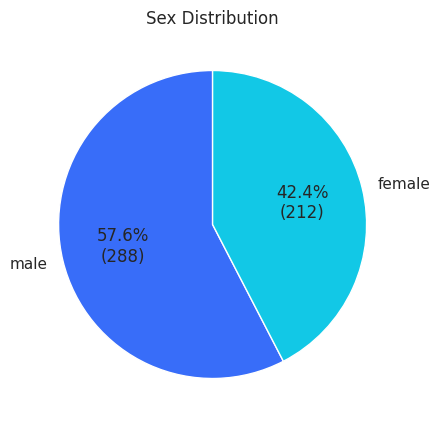

In [ ]:
sex_counts = data['sex'].value_counts()
colors = sns.color_palette('rainbow')[:len(sex_counts)]

# Fungsi untuk menampilkan persentase dan jumlah
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

plt.figure(figsize=(5,5))
sex_counts.plot.pie(autopct=make_autopct(sex_counts), colors=colors, startangle=90)
plt.title('Sex Distribution')
plt.ylabel('')
plt.show()

This indicates a gender imbalance, with male passengers representing a larger portion.

##Survival Distribution

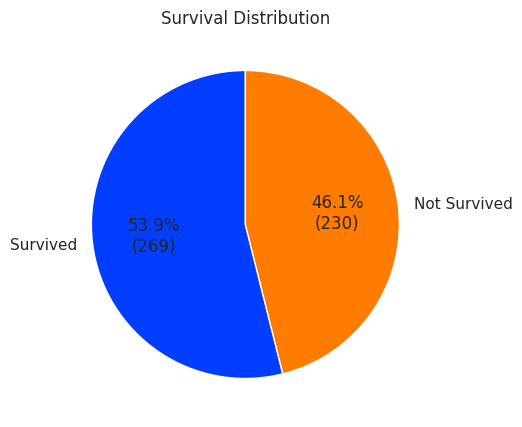

In [ ]:
survived_counts = data['survived'].value_counts()
survived_counts.index = ['Survived', 'Not Survived']
colors = sns.color_palette('bright')[:len(survived_counts)]

# Fungsi untuk menampilkan persentase dan jumlah
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

plt.figure(figsize=(5,5))
survived_counts.plot.pie(autopct=make_autopct(survived_counts), colors=colors, startangle=90)
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()

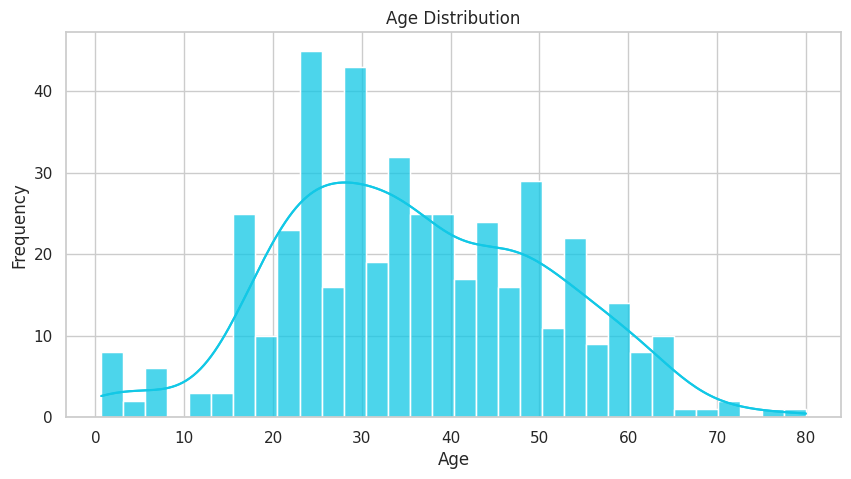

In [ ]:
# Histogram for the distribution of Age
plt.figure(figsize=(10,5))
color = sns.color_palette('rainbow')[1]
sns.histplot(df['age'].dropna(), kde=True, bins=32, color=color)
plt.title('Age Distribution')
plt.xlabel('Age')

sns.histplot(df['age'].dropna(), kde=True, bins=32, color=color)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

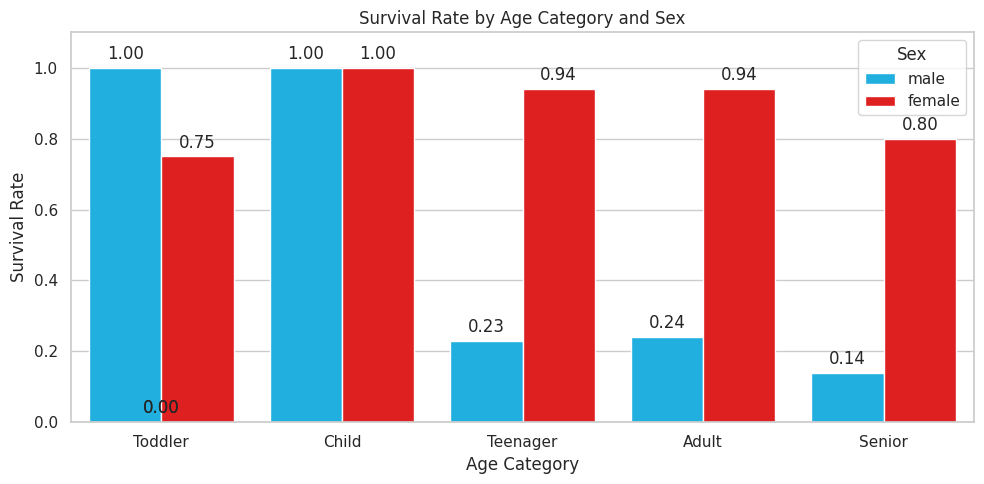

In [ ]:
# Survival Rate by Age Category and Sex
def plot_survival_by_age_and_gender(data2):
    # Calculate survival rate per age category and sex
    survival_rate = data2.groupby(['age_category', 'sex'], observed=True)['survived'].mean().reset_index()
    survival_rate['survived'] = survival_rate['survived'].round(2)

    # Set seaborn style
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 5))

    # Create barplot
    barplot = sns.barplot(data=survival_rate, x='age_category', y='survived', hue='sex', hue_order=['male', 'female'], palette={'male': 'deepskyblue', 'female': 'red'})

    # Add value labels on top of bars
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10),
                         textcoords='offset points')

    plt.title("Survival Rate by Age Category and Sex")
    plt.ylabel("Survival Rate")
    plt.xlabel("Age Category")
    plt.legend(title="Sex")
    plt.ylim(0, 1.1)
    plt.tight_layout()
    plt.show()

plot_survival_by_age_and_gender(data2)


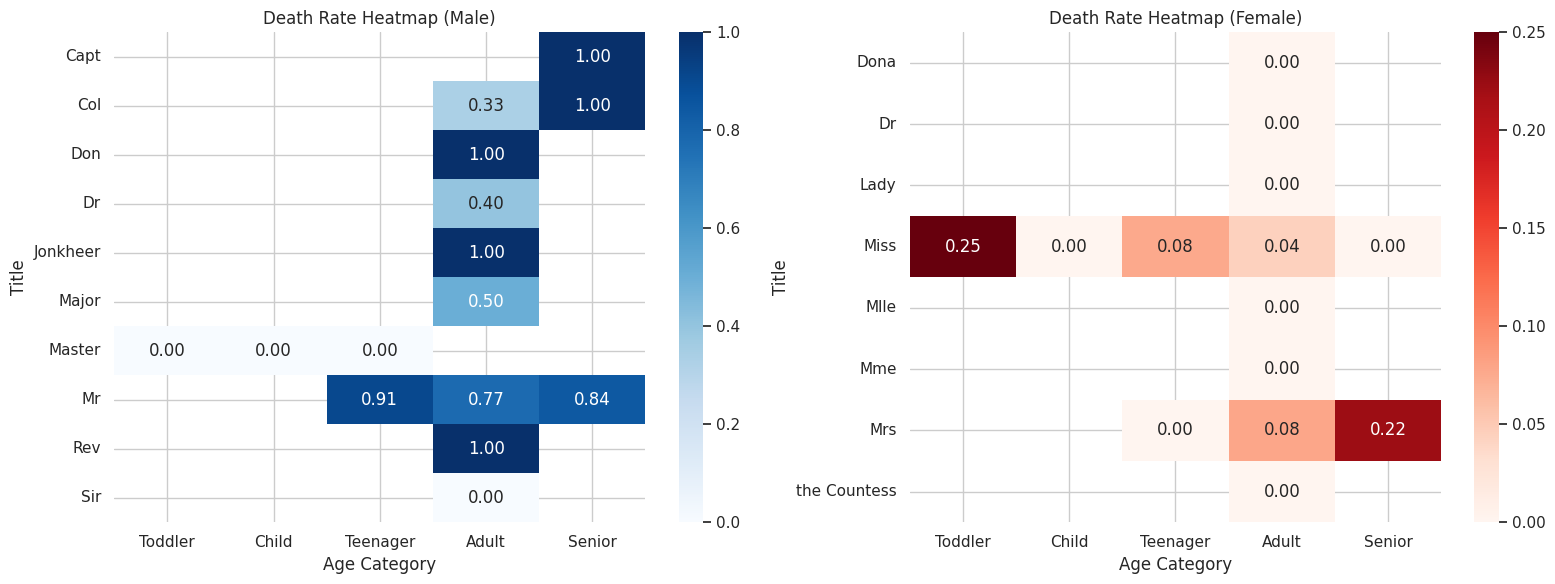

In [ ]:
# Heatmap of Death Rate by Title and Age Category
def plot_death_heatmap_by_title_and_age(data2):
    # Create a 'died' column (1 if died, 0 if survived)
    data2['died'] = 1 - data2['survived']

    # Split the data by gender
    male_data = data2[data2['sex'] == 'male']
    female_data = data2[data2['sex'] == 'female']

    # Pivot tables with observed=True to avoid FutureWarning
    male_pivot = male_data.pivot_table(
        index='title',
        columns='age_category',
        values='died',
        aggfunc='mean',
        observed=True
    )
    female_pivot = female_data.pivot_table(
        index='title',
        columns='age_category',
        values='died',
        aggfunc='mean',
        observed=True
    )

    # Create heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.heatmap(male_pivot, annot=True, cmap='Blues', fmt=".2f", ax=axes[0])
    axes[0].set_title("Death Rate Heatmap (Male)")
    axes[0].set_xlabel("Age Category")
    axes[0].set_ylabel("Title")

    sns.heatmap(female_pivot, annot=True, cmap='Reds', fmt=".2f", ax=axes[1])
    axes[1].set_title("Death Rate Heatmap (Female)")
    axes[1].set_xlabel("Age Category")
    axes[1].set_ylabel("Title")

    plt.tight_layout()
    plt.show()
plot_death_heatmap_by_title_and_age(data2)

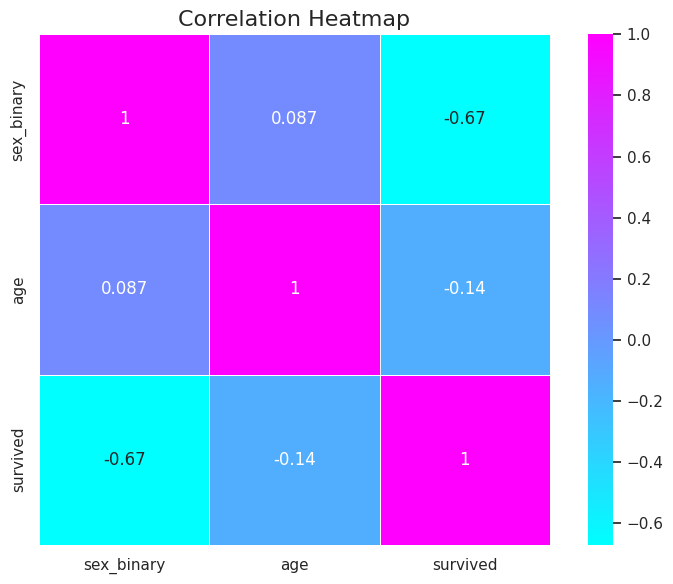

In [ ]:
# Select only the desired columns
selected_columns = data[['sex_binary', 'age', 'survived']]

# Calculate the correlation matrix
corr_mat = selected_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8,6))

# Create the heatmap using seaborn
sns.heatmap(corr_mat, annot=True, cmap='cool', square=True, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Thank you :)